############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --##########################
############################################################################################

Modelos Clasificación : Regresión Logística, Regresión Logística Penalizada, Naive Bayes, K-NN.

Autores : José Cárdenas - André Chávez 

In [1]:
#######################################################################
##### Modelo de Regresión Logística y Logística Penalizada ############
#######################################################################

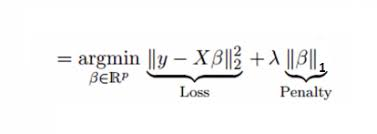

In [1]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [29]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 

In [3]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [25]:
#train.loc[(train['Gender']=='Female')|(train['Married']=='No'),['Gender','Married']]

In [26]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [30]:
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [31]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
#train_parametrica.head(5)

In [32]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())   

In [33]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [36]:
train_parametrica.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0


In [35]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [37]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30)

In [ ]:
#######################################################################
##### Modelo de Regresión Logística ###################################
#######################################################################

In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
#result.summary2()

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.482012
         Iterations 6


In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.228     
Dependent Variable: Loan_Status      AIC:              435.5665  
Date:               2018-08-25 10:12 BIC:              480.2425  
No. Observations:   429              Log-Likelihood:   -206.78   
Df Model:           10               LL-Null:          -267.95   
Df Residuals:       418              LLR p-value:      1.6942e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.3844   0.3394 -1.1326 0.2574 -1.0495  0.2808
Married            0.0725   0.2833  0.2561 0.7979 -0.4826  0.6277
Dependents         0.1116   0.1320  0.8458 0.3976 -0.1471  0.3703
Education         -0.8499   0.2787 -3.0501 0.0023 -1.3961 -0.3038
Self_Employed     -0.4700   0.3283 -1.4317 0.1522 -1.1134  0.1734
ApplicantIncome    0.0000   0.0000  0.7289 0.4660 -0.0000  0.0001
CoapplicantIncome -0.0001   0.0000 -1.3322 0.1828 -0.0001  0.0000
LoanAmount        -0.0023   0.0021 -1.0698 0.2847 -0.0064  0.0019
Loan_Amount_Term  -0.0073   0.0020 -3.6296 0.0003 -0.0112 -0.0033
Credit_History     3.0215   0.3575  8.4507 0.0000  2.3207  3.7223
Property_Area      0.0284   0.1465  0.1938 0.8464 -0.2587  0.3155
=================================================================

"""

In [42]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred=result.predict(X_test)
y_pred2=np.where(y_pred<0.5,0,1)

In [43]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred2))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred2))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred2))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred2))

	Accuracy: 0.800

	Precision: 0.784
	Recall: 0.984
	F1: 0.873



In [44]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.91      0.38      0.53        56
          1       0.78      0.98      0.87       129

avg / total       0.82      0.80      0.77       185



In [35]:
#######################################################################
##### Modelo de Regresión Logística Penalizada ########################
#######################################################################

In [63]:
## Paso N° 01 : Entrenar un modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression(penalty='l2') # Regresion Logistica Ridge
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred=lr.predict(X_test)

In [47]:
## Paso N° 03 : Evaluar indicadores
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.811

	Precision: 0.790
	Recall: 0.992
	F1: 0.880



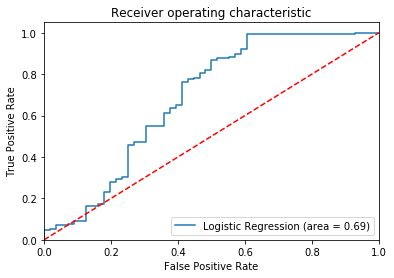

In [48]:
## Paso N° 03 : Evaluar indicadores

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from matplotlib import pyplot as plt

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.39      0.56        56
          1       0.79      0.99      0.88       129

avg / total       0.84      0.81      0.78       185



In [60]:
## Paso N° 03 : Evaluar indicadores
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7) # Definimos el CV
lr = LogisticRegression(penalty='l2') # Definimos el algoritmo a utilizar
scoring = 'accuracy' # Definimos la métrica de evaluación

results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.809


In [67]:
## Paso N° 04: Puntuamos o scoreamos sobre información nueva o clientes sin VD.
# Como ya hemos entrenado un Modelo de Clasificación , podemos trabajar con el archivo de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [68]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [53]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [69]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mean())  

In [55]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [70]:
test_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3


In [71]:
# Eliminamos el ID para poder scorear o puntuar los registros
test_parametrica = test_parametrica.drop('Loan_ID', axis=1) 

In [72]:
y_final = lr.predict(test_parametrica) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

In [74]:
#y_final

In [75]:
data = np.hstack((test['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Reg_Logistica001.csv', index=False)

In [43]:
## !! Listo , lo evaluamos en AnalyticsVidhya !!

In [ ]:
#######################################################################
##### Modelo de Regresión Logística Penalizada Lasso ##################
#######################################################################

In [18]:
lr2 = LogisticRegression(penalty='l1') # Regresion Logistica Lasso
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#######################################################################
##### Modelo de Clasificación Bayesiano : de Naive Bayes ##############
#######################################################################

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [ ]:
#######################################################################
##### Modelo de Clasificación : K-NN ##################################
#######################################################################

In [48]:
from sklearn.neighbors import KNeighborsClassifier # Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')